In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv('csv/headbrain.csv')

In [3]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
x = df['Head Size(cm^3)']
y = df['Brain Weight(grams)']

In [5]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [6]:
df['X-X\'(A)'] = df['Head Size(cm^3)'] - x_mean
df['Y-Y\'(B)'] = df['Brain Weight(grams)'] - y_mean
df['A*B'] = df['X-X\'(A)'] * df['Y-Y\'(B)']
df['A^2'] = df['X-X\'(A)']**2

In [7]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams),X-X'(A),Y-Y'(B),A*B,A^2
0,1,1,4512,1530,878.008439,247.126582,216979.224697,770898.818637
1,1,1,3738,1297,104.008439,14.126582,1469.283769,10817.755345
2,1,1,4261,1335,627.008439,52.126582,32683.806975,393139.582350
3,1,1,3777,1282,143.008439,-0.873418,-124.906105,20451.413573
4,1,1,4177,1590,543.008439,307.126582,166772.325963,294858.164628


In [8]:
m = sum(df['A*B'])/sum(df['A^2'])
print(m)

0.26342933948939945


In [9]:
c = y_mean - m * x_mean
print(c)

325.57342104944223


In [10]:
df['Predicted Values(Yp)'] = m * df['Head Size(cm^3)'] + c
df['Yp - Y\'(C)'] = df['Predicted Values(Yp)'] - y_mean
df['C^2'] = df['Yp - Y\'(C)'] ** 2
df['B^2'] = df['Y-Y\'(B)'] ** 2
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams),X-X'(A),Y-Y'(B),A*B,A^2,Predicted Values(Yp),Yp - Y'(C),C^2,B^2
0,1,1,4512,1530,878.008439,247.126582,216979.224697,770898.818637,1514.166601,231.293183,53496.536550,61071.547669
1,1,1,3738,1297,104.008439,14.126582,1469.283769,10817.755345,1310.272292,27.398874,750.698315,199.560327
2,1,1,4261,1335,627.008439,52.126582,32683.806975,393139.582350,1448.045837,165.172419,27281.927963,2717.180580
3,1,1,3777,1282,143.008439,-0.873418,-124.906105,20451.413573,1320.546036,37.672619,1419.226191,0.762859
4,1,1,4177,1590,543.008439,307.126582,166772.325963,294858.164628,1425.917772,143.044354,20461.687319,94326.737542


In [11]:
print(f"R square value: {1 - sum(df['C^2'])/sum(df['B^2'])}")

R square value: 0.3606882800429999


Text(0, 0.5, 'Brain Weight(grams)')

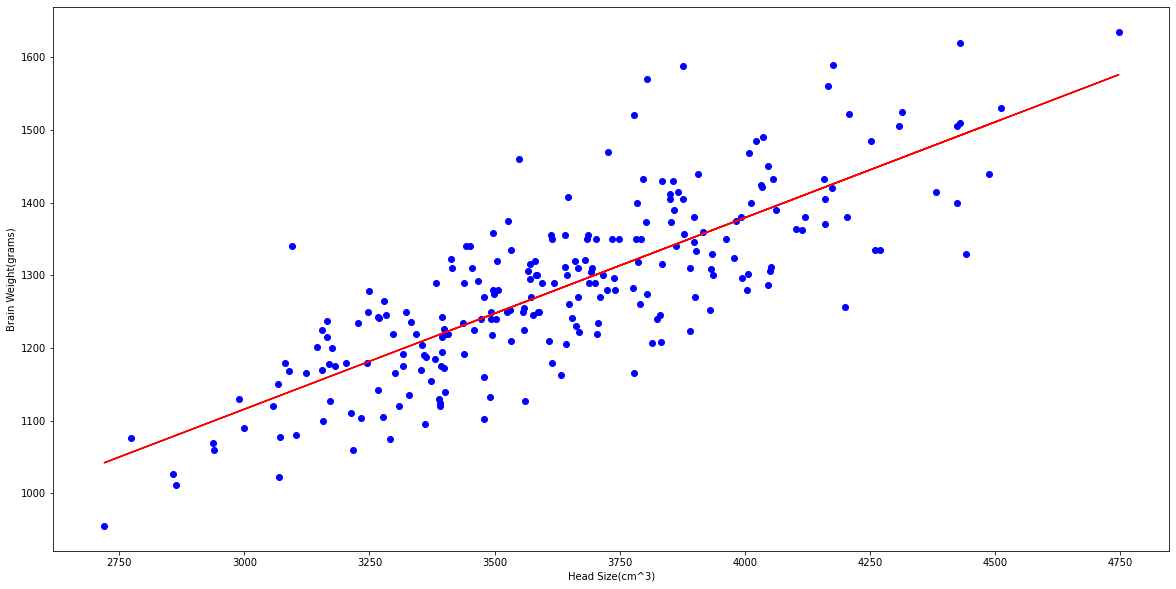

In [12]:
plt.scatter(x, y, c='#0000FF', label='Scatter plot')
plt.plot(df['Head Size(cm^3)'], df['Predicted Values(Yp)'], c="#FF0000", label='Regression Line')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')